In [1]:
#Imports
%matplotlib inline
from scipy import stats

import scipy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#list of players stats datafromes
lst_players_df = []
#over range 0-16 read csv into list
for i in range(17):
    if i < 10:
        lst_players_df.append(pd.read_csv('clean_players_200'+str(i)+'.csv'))
    else:
        lst_players_df.append(pd.read_csv('clean_players_20'+str(i)+'.csv'))
        
print(type(lst_players_df[0]))

<class 'pandas.core.frame.DataFrame'>


In [3]:
for df in lst_players_df: #for each df in list
    #Each show to be likley from a LOGNORM distrobution
    #So we are converting each value to its log value to normalize the 
    #distribution so that we can use the z-score test for impact calculation
    #getting rid of 0's replacing with 1/minplayed ((1/game)/(min/game)) 
    df['PTS'].replace(0, 1/df['MIN'], inplace = True)
    df['AST'].replace(0, 1/df['MIN'], inplace = True)
    df['TOV'].replace(0, 1/df['MIN'], inplace = True)
    df['REB'].replace(0, 1/df['MIN'], inplace = True)
    df['STL'].replace(0, 1/df['MIN'], inplace = True)
    df['BLK'].replace(0, 1/df['MIN'], inplace = True)
    df['LOGPTS'] = np.log(df['PTS'])
    df['LOGAST'] = np.log(df['AST'])
    df['LOGTOV'] = np.log(df['TOV'])
    df['LOGREB'] = np.log(df['REB'])
    df['LOGSTL'] = np.log(df['STL'])
    df['LOGBLK'] = np.log(df['BLK'])

In [4]:
#list of average points/pergame for each season
lst_yearly_logpts_avg = []
#list of points/pergame standard deviation for each season
lst_yearly_logpts_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logpts_avg.append(np.mean(df['LOGPTS']))#calculate avg points and append into list of avgs
    lst_yearly_logpts_stddev.append(np.std(df['LOGPTS']))#calculate stddev of points and append into list of stddevs


#list of average assist/pergame for each season
lst_yearly_logast_avg = [] 
#list of assist/pergame standard deviation for each season
lst_yearly_logast_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logast_avg.append(np.mean(df['LOGAST']))#calculate avg assist and append into list of avgs
    lst_yearly_logast_stddev.append(np.std(df['LOGAST']))#calculate stddev of assist and append into list of stddevs

#list of average turnover/pergame for each season
lst_yearly_logtov_avg = [] 
#list of turnover/pergame standard deviation for each season
lst_yearly_logtov_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logtov_avg.append(np.mean(df['LOGTOV']))#calculate avg turnover and append into list of avgs
    lst_yearly_logtov_stddev.append(np.std(df['LOGTOV']))#calculate stddev of turnover and append into list of stddevs

#list of average rebound/pergame for each season
lst_yearly_logreb_avg = [] 
#list of rebound/pergame standard deviation for each season
lst_yearly_logreb_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logreb_avg.append(np.mean(df['LOGREB']))#calculate avg rebound and append into list of avgs
    lst_yearly_logreb_stddev.append(np.std(df['LOGREB']))#calculate stddev of rebound and append into list of stddevs

#list of average steal/pergame for each season
lst_yearly_logstl_avg = [] 
#list of steal/pergame standard deviation for each season
lst_yearly_logstl_stddev = []
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logstl_avg.append(np.mean(df['LOGSTL']))#calculate avg steal and append into list of avgs
    lst_yearly_logstl_stddev.append(np.std(df['LOGSTL']))#calculate stddev of steal and append into list of stddevs

#list of average block/pergame for each season
lst_yearly_logblk_avg = [] 
#list of block/pergame standard deviation for each season
lst_yearly_logblk_stddev = [] 
for df in lst_players_df: #for each df in list of player stat df
    lst_yearly_logblk_avg.append(np.mean(df['LOGBLK']))#calculate avg block and append into list of avgs
    lst_yearly_logblk_stddev.append(np.std(df['LOGBLK']))#calculate stddev of block and append into list of stddevs
    

In [5]:
#setting arbitraly weights valued based on consensus of how much each stat was worth in points
f_pts_weight = 1.0 #1 point is worth 1 points
f_reb_weight = 1.2 #rebounds don't necessarily lead to a score but give more oppotunities for them so estimated by 2.3 * .55(hish est fg%)
f_blk_weight = 2.3 #denial of a shot 2-3, twos are more common than threes so that is why it is 2.3 instead of 2.5
f_stl_weight = 1.8 #worth more than rebound due to likleyhood of fastbreak
f_ast_weight = 2.3 #always leads to a score so opposite of block
f_tov_weight = -1.8 #basically opposite of steal

In [6]:
#calculating impact
index = 0
    
for df in lst_players_df:
    impact_val = []
    for i, row in df.iterrows():
        #calculate z-score of normalized distribution
        pts_zval = (row['LOGPTS']-lst_yearly_logpts_avg[index])/lst_yearly_logpts_stddev[index]
        ast_zval = (row['LOGAST']-lst_yearly_logast_avg[index])/lst_yearly_logast_stddev[index]
        reb_zval = (row['LOGREB']-lst_yearly_logreb_avg[index])/lst_yearly_logreb_stddev[index]
        blk_zval = (row['LOGBLK']-lst_yearly_logblk_avg[index])/lst_yearly_logblk_stddev[index]
        stl_zval = (row['LOGSTL']-lst_yearly_logstl_avg[index])/lst_yearly_logstl_stddev[index]
        tov_zval = (row['LOGTOV']-lst_yearly_logtov_avg[index])/lst_yearly_logtov_stddev[index]
        impact_val.append((row['LOGPTS']*f_pts_weight*math.e**(pts_zval/2)) +\
                          (row['LOGAST']*f_ast_weight*math.e**(ast_zval/2)) +\
                          (row['LOGREB']*f_reb_weight*math.e**(reb_zval/2)) +\
                          (row['LOGBLK']*f_blk_weight*math.e**(blk_zval/2)) +\
                          (row['LOGSTL']*f_stl_weight*math.e**(stl_zval/2)) +\
                          (row['LOGTOV']*f_tov_weight*math.e**(tov_zval/2)))
    df["IMPACT"] = impact_val
    index += 1


0      -0.953317
1       6.944188
2       2.250186
3       6.530354
4       4.024322
5       4.270271
6      -0.573403
7       4.714069
8      16.269523
9      12.850660
10     -3.878851
11     -4.156092
12     11.128466
13     -4.250886
14     18.677734
15     10.679489
16     -2.734149
17      7.944575
18     -1.164696
19      7.953219
20      5.044428
21     -1.240455
22      9.191327
23      2.529415
24     14.716240
25      3.247497
26     10.219007
27      5.347970
28     -3.045697
29     -1.302799
         ...    
381     6.350287
382    -4.341277
383    -1.757746
384     3.540196
385     2.431887
386    -0.693209
387     4.623076
388     2.247171
389     3.356020
390     3.152712
391    -3.446483
392     3.525674
393    13.864701
394    -1.531110
395    12.744611
396     1.334061
397    -0.669878
398    -3.058553
399     2.677432
400     6.824476
401     0.778473
402    -2.446698
403    -2.513262
404     7.125548
405    -1.445071
406    -2.864546
407    -3.970449
408     1.4281

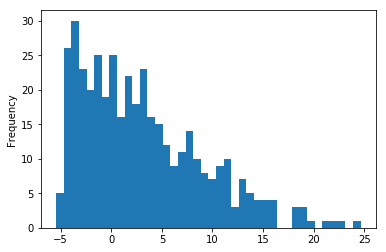

In [7]:
print(lst_players_df[1]['IMPACT'])
lst_players_df[1]['IMPACT'].plot.hist(bins = 40)

In [8]:
#create list each item is a dictionary for each season that contains each teams players individual impact values
lst_season_team_player_impacts = []
#for each df_season in lst_player_df
for df_season in lst_players_df:
    #create dictionary ['TEAM_ID'] = list of impact values of players on team
    team_impacts_dict = dict()
    #for each player in df_season
    for i, row in df_season.iterrows():
        #grab players team ID
        key = row['TEAM_ID']
        #check if ID is not a key in the dict
        if key not in team_impacts_dict:
            #then create key in dict
            team_impacts_dict[key] = []
        #append value into key array
        team_impacts_dict[key].append(row['IMPACT'])
    #append dict into list
    lst_season_team_player_impacts.append(team_impacts_dict)

In [9]:
#create list each item is a dict for each season that contains impact mean and stddev
lst_season_team_impact_meanstddev = []
#for each dictionary in lst_season_team_player
for season_dict in lst_season_team_player_impacts:
    #create df to hold TEAM_ID, IMP_MEAN, IMP_STD
    df_team_impact_stats = pd.DataFrame()
    lst_team_id = []
    lst_imp_mean = []
    lst_imp_stddev =[]
    #for each key in team players impacts dictionary
    for key, values in season_dict.items(): #populate lists
        lst_team_id.append(key)
        lst_imp_mean.append(np.mean(values))
        lst_imp_stddev.append(np.std(values))
    #fill df
    df_team_impact_stats['TEAM_ID'] = lst_team_id
    df_team_impact_stats['IMP_MEAN'] = lst_imp_mean
    df_team_impact_stats['IMP_STD'] = lst_imp_stddev
    #append df into list
    lst_season_team_impact_meanstddev.append(df_team_impact_stats)

0     2.679691
1     2.295261
2     4.516480
3     2.724042
4     3.432748
5     2.274397
6     2.374848
7     1.751362
8     2.459293
9     4.383524
10    2.126196
11    3.133415
12    4.093001
13    3.809379
14    2.656002
15    4.454801
16    3.617052
17    1.959801
18    3.996218
19    3.495920
20    3.517127
21    2.701743
22    2.650901
23    2.920672
24    4.082740
25    2.751035
26    3.915756
27    1.337545
28    3.454460
Name: IMP_MEAN, dtype: float64


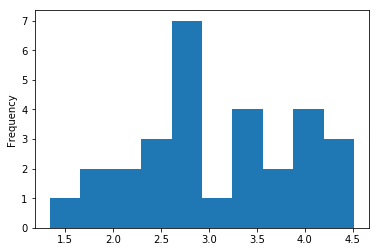

In [10]:
print(lst_season_team_impact_meanstddev[0]['IMP_MEAN'])
lst_season_team_impact_meanstddev[0]['IMP_MEAN'].plot.hist()

0     5.559697
1     5.591808
2     7.288375
3     4.897315
4     5.672289
5     5.641749
6     6.245445
7     4.298780
8     6.195844
9     6.737841
10    4.532157
11    7.109228
12    6.732642
13    7.682105
14    7.281559
15    5.359979
16    6.741422
17    5.903186
18    7.486802
19    5.697869
20    8.086799
21    4.696127
22    4.946825
23    6.116150
24    6.575004
25    5.475303
26    7.156718
27    2.866839
28    5.258141
Name: IMP_STD, dtype: float64


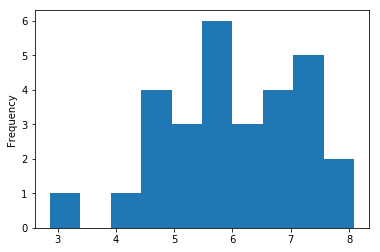

In [11]:
print(lst_season_team_impact_meanstddev[0]['IMP_STD'])
lst_season_team_impact_meanstddev[0]['IMP_STD'].plot.hist()

In [12]:
for df in lst_season_team_impact_meanstddev:
    print(df.shape)

(29, 3)
(29, 3)
(29, 3)
(29, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)
(30, 3)


In [13]:
lst_ranked_teams_df = []
#over range 0-16 read csv into list
for i in range(17):
    if i < 10:
        lst_ranked_teams_df.append(pd.read_csv('ranked_teams_200'+str(i)+'.csv'))
    else:
        lst_ranked_teams_df.append(pd.read_csv('ranked_teams_20'+str(i)+'.csv'))
        
print(lst_ranked_teams_df[0])

    Unnamed: 0     TEAM_ID               TEAM_NAME  GP   W   L  W_PCT   MIN  \
0            0  1610612759       San Antonio Spurs  82  58  24  0.707  48.4   
1            0  1610612755      Philadelphia 76ers  82  56  26  0.683  48.4   
2            0  1610612747      Los Angeles Lakers  82  56  26  0.683  48.5   
3            0  1610612758        Sacramento Kings  82  55  27  0.671  49.0   
4            0  1610612762               Utah Jazz  82  53  29  0.646  48.2   
5            0  1610612742        Dallas Mavericks  82  53  29  0.646  48.3   
6            0  1610612749         Milwaukee Bucks  82  52  30  0.634  48.2   
7            0  1610612756            Phoenix Suns  82  51  31  0.622  48.3   
8            0  1610612748              Miami Heat  82  50  32  0.610  48.5   
9            0  1610612757  Portland Trail Blazers  82  50  32  0.610  48.2   
10           0  1610612752         New York Knicks  82  48  34  0.585  48.5   
11           0  1610612750  Minnesota Timberwolves  

In [14]:
lst_ranked_team_impact_df =[]
for index in range(len(lst_season_team_impact_meanstddev)):
    lst_ranked_team_impact_df.append(pd.merge(lst_ranked_teams_df[index], lst_season_team_impact_meanstddev[index], on= ['TEAM_ID']))

print(lst_ranked_team_impact_df[0])

    Unnamed: 0     TEAM_ID               TEAM_NAME  GP   W   L  W_PCT   MIN  \
0            0  1610612759       San Antonio Spurs  82  58  24  0.707  48.4   
1            0  1610612755      Philadelphia 76ers  82  56  26  0.683  48.4   
2            0  1610612747      Los Angeles Lakers  82  56  26  0.683  48.5   
3            0  1610612758        Sacramento Kings  82  55  27  0.671  49.0   
4            0  1610612762               Utah Jazz  82  53  29  0.646  48.2   
5            0  1610612742        Dallas Mavericks  82  53  29  0.646  48.3   
6            0  1610612749         Milwaukee Bucks  82  52  30  0.634  48.2   
7            0  1610612756            Phoenix Suns  82  51  31  0.622  48.3   
8            0  1610612748              Miami Heat  82  50  32  0.610  48.5   
9            0  1610612757  Portland Trail Blazers  82  50  32  0.610  48.2   
10           0  1610612752         New York Knicks  82  48  34  0.585  48.5   
11           0  1610612750  Minnesota Timberwolves  

In [24]:
customers = lst_ranked_team_impact_df[0][['CFPARAMS','IMP_MEAN']]
customers.set_index('CFPARAMS')

,IMP_MEAN
CFPARAMS,
San Antonio Spurs,2.656002
Philadelphia 76ers,4.516480
Los Angeles Lakers,3.517127
Sacramento Kings,3.996218
Utah Jazz,2.920672
Dallas Mavericks,4.082740
Milwaukee Bucks,3.454460
Phoenix Suns,3.915756
Miami Heat,2.679691


Text(0,0.5,'Avg Impact')

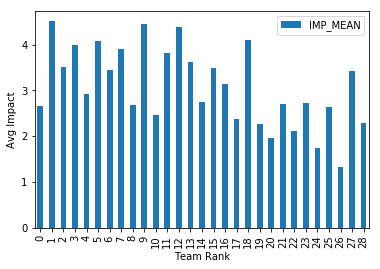

In [27]:
my_plot = customers.plot(kind='bar')
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Avg Impact")

Text(0,0.5,'Impact Standard Deviation')

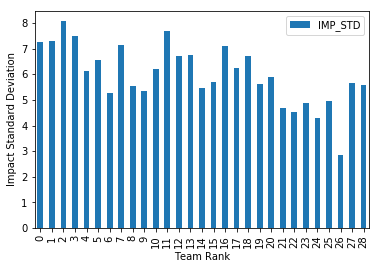

In [28]:
deviation_graph = lst_ranked_team_impact_df[0][['CFPARAMS','IMP_STD']]
deviation_graph.set_index('CFPARAMS')
my_plot = deviation_graph.plot(kind='bar')
my_plot.set_xlabel("Team Rank")
my_plot.set_ylabel("Impact Standard Deviation")